# Supply Data Analysis
### vishal bansal

> **report questions:**
> <ol>
    <li>What is the supply to demand dynamic and whether they match?</li>
    <li>Where are the hours of oversupply? Can we shift some of them to undersupply hours?</li>
  <ol>

In [1]:
# the imports statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import rc
from matplotlib.colors import Normalize
%matplotlib inline

In [2]:
# loading the data

driver_activity = pd.read_csv('Hourly_DriverActivity_1.csv - Hourly_DriverActivity_1.csv.csv')
overview_search = pd.read_csv('Hourly_OverviewSearch_1.csv - Hourly_OverviewSearch_1.csv.csv')

In [3]:
# viewing the driver activity data
driver_activity

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0
...,...,...,...,...,...,...,...,...,...
835,2016-11-14 04,15,6,0,6,6,0.4,0.00,NaN
836,2016-11-14 03,18,7,0,7,7,0.4,0.00,NaN
837,2016-11-14 02,21,7,0,7,9,0.3,0.14,1.0
838,2016-11-14 01,29,9,1,8,11,0.3,0.22,2.0


In [4]:
# viewing the overview search data
overview_search

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23,9,32,78
1,2016-12-18 22,29,64,69
2,2016-12-18 21,5,39,89
3,2016-12-18 20,13,48,79
4,2016-12-18 19,12,77,87
...,...,...,...,...
834,2016-11-14 04,4,4,50
835,2016-11-14 03,1,2,67
836,2016-11-14 02,3,6,67
837,2016-11-14 01,8,8,50


In [5]:
driver_activity.describe()

,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,795.000000
mean,61.603571,23.197619,6.308333,16.903571,15.269048,0.370000,0.568786,14.764780
std,25.945275,11.101503,5.536652,9.068747,6.414301,0.068214,0.386042,11.362529
min,9.000000,2.000000,0.000000,2.000000,1.000000,0.100000,0.000000,1.000000
25%,41.000000,14.000000,2.000000,10.000000,10.000000,0.300000,0.290000,6.000000
50%,63.000000,23.000000,5.000000,16.000000,15.000000,0.400000,0.500000,12.000000
75%,80.250000,31.000000,9.000000,23.000000,20.000000,0.400000,0.790000,20.000000
max,129.000000,56.000000,29.000000,48.000000,37.000000,0.600000,2.030000,62.000000


In [6]:
overview_search.describe()

,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
count,839.000000,839.000000,839.000000
mean,12.240763,36.041716,75.661502
std,16.602303,25.160951,18.342403
min,0.000000,0.000000,0.000000
25%,3.000000,19.000000,66.000000
50%,6.000000,32.000000,80.000000
75%,14.000000,49.000000,89.000000
max,129.000000,172.000000,100.000000


In [7]:
# checking for nan values that needs to be cleaned
print(f"does the driver dataset have nan values: {driver_activity.isnull().values.any()} and overview dataset: {overview_search.isnull().values.any()}")

does the driver dataset have nan values: True and overview dataset: False


### Data Cleaning

**In this section I will clean the data from both datasets.**

first I will replace the nan values with zeros because the driver activity dataset has nan values

In [8]:
driver_activity = driver_activity.fillna(0)

In [9]:
# checking to see if there are still nan values in the dataset
print(f"does the driver dataset have nan values: {driver_activity.isnull().values.any()} and overview dataset: {overview_search.isnull().values.any()}")

does the driver dataset have nan values: False and overview dataset: False


In [10]:
overview_search = overview_search.fillna(0)

In [11]:
driver_activity.rename(columns = {'Date' : 'date' , 'Active drivers': 'active_drivers' , 'Online (h)':'online', 'Has booking (h)':'booked' , 'Waiting for booking (h)':'waiting', 'Busy (h)': 'busy', 'Hours per active driver' : 'hpd' , 'Rides per online hour' : 'rph', 'Finished Rides': 'finished' }, inplace = True) 

In [12]:
overview_search.rename(columns = {'People saw 0 cars (unique)' : 'zero_cars' , 'People saw +1 cars (unique)' : 'saw_cars' , 'Coverage Ratio (unique)' : 'cr'} ,inplace = True )
overview_search

,Date,zero_cars,saw_cars,cr
0,2016-12-18 23,9,32,78
1,2016-12-18 22,29,64,69
2,2016-12-18 21,5,39,89
3,2016-12-18 20,13,48,79
4,2016-12-18 19,12,77,87
...,...,...,...,...
834,2016-11-14 04,4,4,50
835,2016-11-14 03,1,2,67
836,2016-11-14 02,3,6,67
837,2016-11-14 01,8,8,50


### Exploratory Data Analysis

**1- Show which 36 hours in a week are most undersupplied. Show/describe your decision based on sample data?**

to calculate the undersupplied we need to calculate the number of hours where the driver wasn't available to cover the client's needs. the driver is not availabe if they are busy or has booking. 

In [13]:
driver_activity['supply'] = (driver_activity['busy'] + driver_activity['booked'])/driver_activity['active_drivers']
driver_activity

,date,active_drivers,online,booked,waiting,busy,hpd,rph,finished,supply
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0,0.326923
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0,0.389831
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0,0.305556
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0,0.255814
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0,0.402439
...,...,...,...,...,...,...,...,...,...,...
835,2016-11-14 04,15,6,0,6,6,0.4,0.00,0.0,0.400000
836,2016-11-14 03,18,7,0,7,7,0.4,0.00,0.0,0.388889
837,2016-11-14 02,21,7,0,7,9,0.3,0.14,1.0,0.428571
838,2016-11-14 01,29,9,1,8,11,0.3,0.22,2.0,0.413793


In [14]:
overview_search['total'] = overview_search['saw_cars'] / (overview_search['cr']/100)
overview_search = overview_search.fillna(0)

In [15]:
driver_activity['availabe_drivers'] = (driver_activity['online'] - driver_activity['supply'])/overview_search['total']
driver_activity['peak'] = (overview_search['zero_cars'] + overview_search['saw_cars'])/100
driver_activity = driver_activity.fillna(0)

In [16]:
driver_activity['unsupplied'] = driver_activity['busy'] + driver_activity['booked']
udersupplied_data = driver_activity.sort_values(by='unsupplied', ascending=False).head(36)

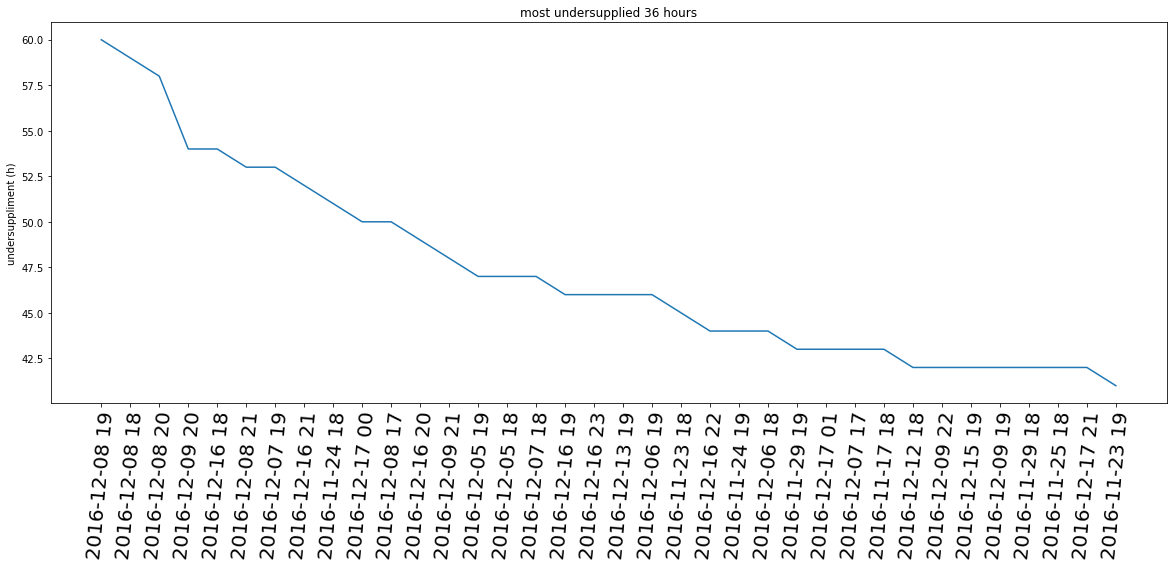

In [17]:
plt.figure(figsize=(20,7))
plt.plot(udersupplied_data['date'] , udersupplied_data['unsupplied']);
plt.xticks(udersupplied_data['date'], udersupplied_data['date'], rotation = 85, fontsize=20);
plt.title("most undersupplied 36 hours");
plt.ylabel("undersuppliment (h)");

In the above plot we calculated the most undersupplied 36 hours by having the date and the hours on the x axis and the undersupplied hours on the y axis. 
The hours when the driver is busy and booked are the hours that the driver can't provide any service for the rider which means that this is the undersupplied hours.

**2- 24-hour curve of average supply and demand (to illustrate match/mismatch).**

In [18]:
dict_ = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5:0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19:0 , 20:0 , 21:0 , 22:0 , 23:0}
for x in range(23,-1,-1):
    list_ = []
    for i in range(x, len(driver_activity),24):
        list_.append(driver_activity['supply'][i])
    dict_[x] += np.average(list_)

In [19]:
overview_search['total'] = overview_search['total'].replace(to_replace=0,value = 1)

In [20]:
overview_search['avg_demand'] =  (overview_search['zero_cars'] + overview_search['saw_cars'])/overview_search['total']

In [21]:
dict2_ = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5:0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19:0 , 20:0 , 21:0 , 22:0 , 23:0}
for x in range(23,-1,-1):
    list2_ = []
    for i in range(x, len(overview_search),24):
        list2_.append(overview_search['avg_demand'][i])
    dict2_[x] += np.average(list2_)

Text(0, 0.5, 'average supply')

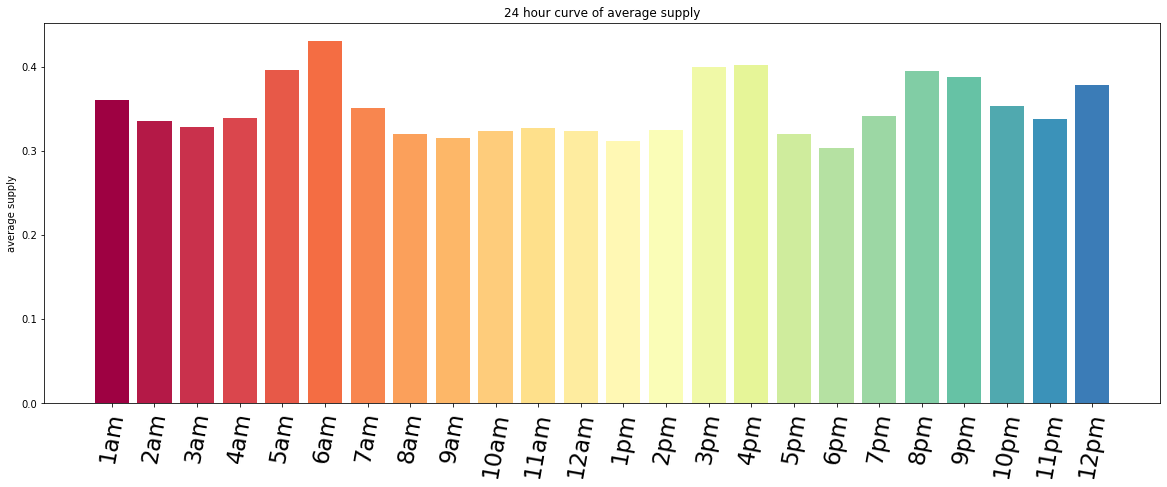

In [22]:
plt.figure(figsize=(20,7))
my_cmap = cm.get_cmap('Spectral')
my_norm = Normalize(vmin=0, vmax=25)
plt.bar(*zip(*dict_.items()),color=my_cmap(my_norm([i for i in range(24)])))
plt.xticks([i for i in range(24)], [str(i)+"am" for i in range(1 ,13)] + [str(i)+"pm" for i in range(1 ,13)] ,rotation = 80, fontsize=23);
plt.title("24 hour curve of average supply");
plt.ylabel("average supply")

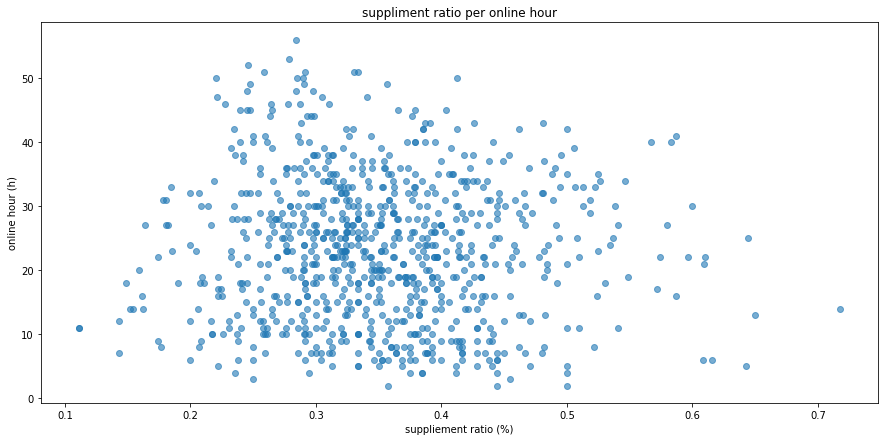

In [23]:
plt.figure(figsize=(15,7))
plt.scatter(driver_activity['supply'] , driver_activity['online'], alpha = 0.6);
plt.title("suppliment ratio per online hour");
plt.xlabel("suppliement ratio (%)");
plt.ylabel("online hour (h)");

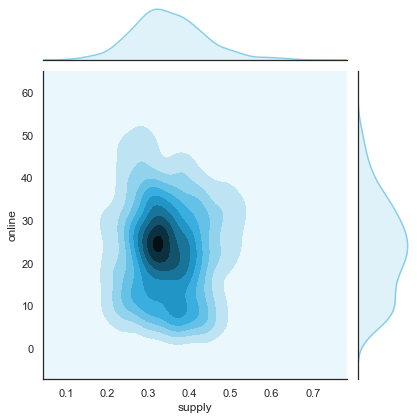

In [24]:
sns.set(style="white", color_codes=True)
sns.jointplot(x = driver_activity['supply'] , y = driver_activity['online'], kind='kde' , color="skyblue");

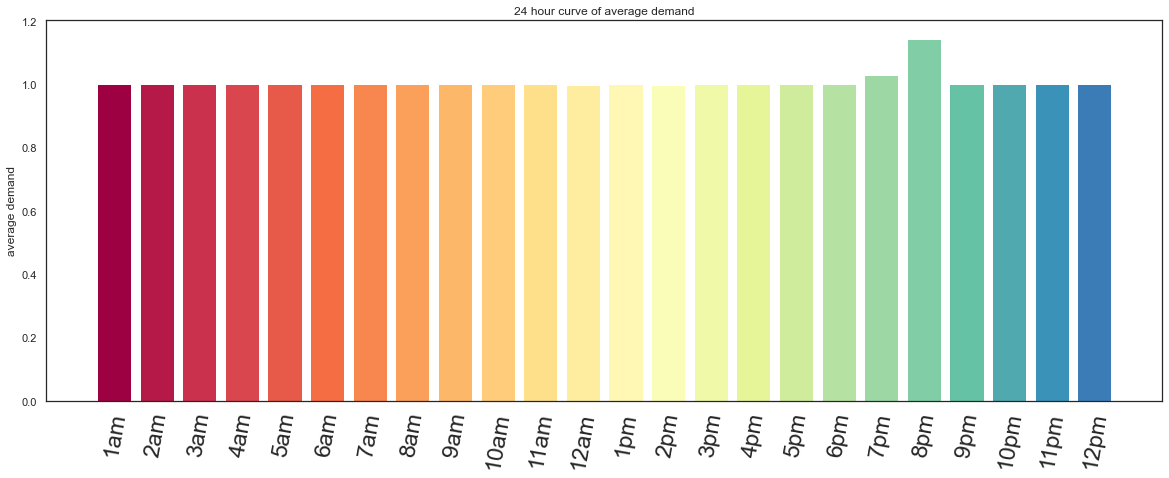

In [25]:
plt.figure(figsize=(20,7))
my_cmap = cm.get_cmap('Spectral')
my_norm = Normalize(vmin=0, vmax=25)
plt.bar(*zip(*dict2_.items()),color=my_cmap(my_norm([i for i in range(24)])))
plt.xticks([i for i in range(24)], [str(i)+"am" for i in range(1 ,13)] + [str(i)+"pm" for i in range(1 ,13)] ,rotation = 80, fontsize=23);
plt.title("24 hour curve of average demand");
plt.ylabel("average demand");

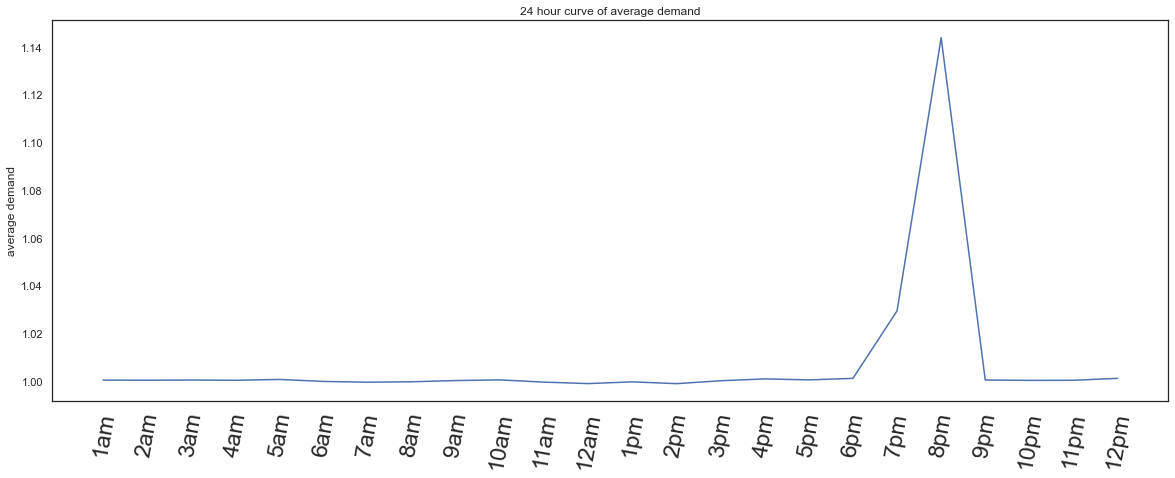

In [26]:
plt.figure(figsize=(20,7))
plt.plot(*zip(*dict2_.items()))
plt.xticks([i for i in range(24)], [str(i)+"am" for i in range(1 ,13)] + [str(i)+"pm" for i in range(1 ,13)] ,rotation = 80, fontsize=23);
plt.title("24 hour curve of average demand");
plt.ylabel("average demand");

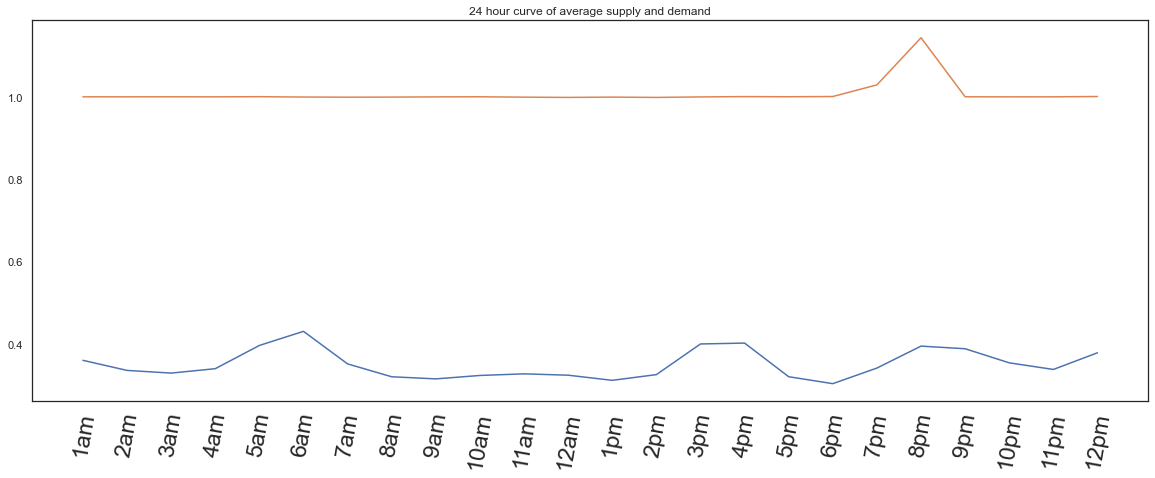

In [27]:
plt.figure(figsize=(20,7))
x, y = zip(*sorted(dict_.items())) # unpack a list of pairs into two tuples
i, j = zip(*sorted(dict2_.items()))
plt.plot(x, y)
plt.plot(i,j)
plt.xticks([i for i in range(24)], [str(i)+"am" for i in range(1 ,13)] + [str(i)+"pm" for i in range(1 ,13)] ,rotation = 80, fontsize=23);
plt.title("24 hour curve of average supply and demand");

In the above charts we calculated the 24-hour curve of average supply and demand. first I calculated the driver supply and calculated it then I caculated the demand by divinding the number of users whi saw the cars and the number of users who didn't saw the car on the total number of users.

**3- Visualisation of hours where we lack supply during a weekly period. This one we can send to drivers to show when to online for extra hours.**

In [28]:
driver_activity = driver_activity.fillna(0)
peak_ordered = driver_activity.sort_values(by='peak', ascending=False).head(50)
peak_ordered['pup'] = peak_ordered['unsupplied']/peak_ordered['peak']

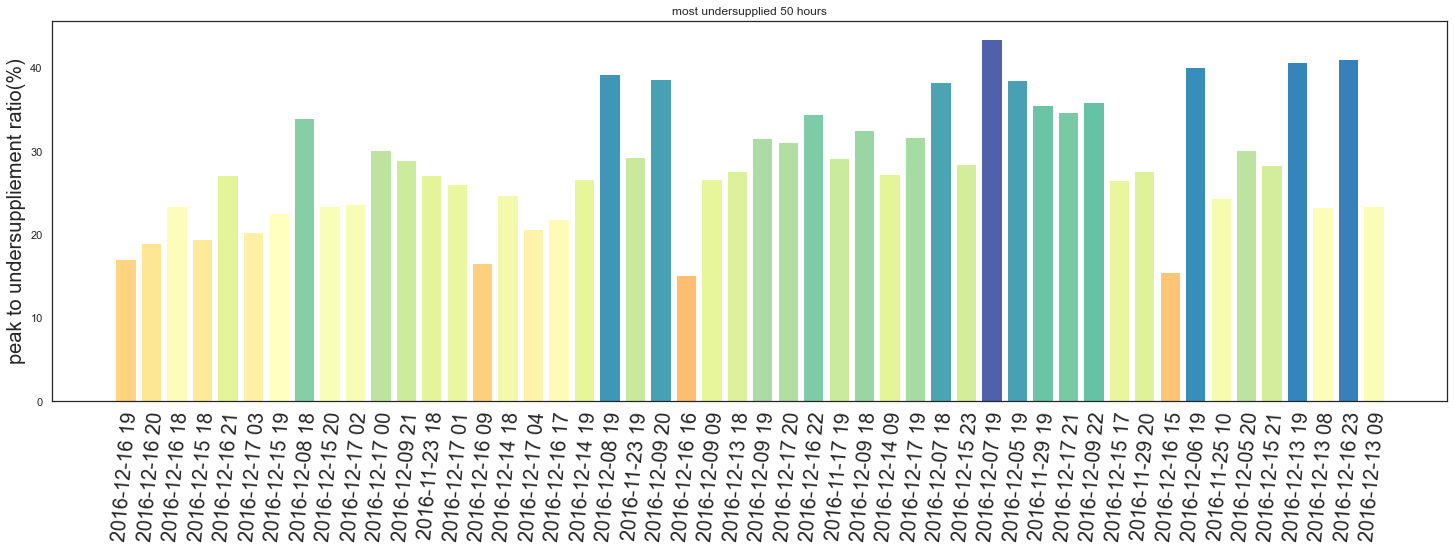

In [29]:
plt.figure(figsize=(25,7))
my_cmap = cm.get_cmap('Spectral')
my_norm = Normalize(vmin=0, vmax=45)
plt.bar(peak_ordered['date'] , peak_ordered['pup'], color=my_cmap(my_norm(peak_ordered['pup'])));
plt.xticks(peak_ordered['date'], peak_ordered['date'], rotation = 85, fontsize=20);
plt.title("most undersupplied 50 hours");
plt.ylabel("peak to undersuppliement ratio(%)", fontsize=20);

In the above chart we calculated the most undersupplied 50 hours. In these hours we have the highest peak and the lowest undersuppliement ratio. these are the hours that we need the drivers to cover the undersuppliement in the orders.

**4- Estimate number of hours needed to ensure we have a high Coverage Ratio during most peak hours.**

In [30]:
peak_ordered['supplyPerPeak'] = 1 - ((peak_ordered['online'] - peak_ordered['unsupplied'])/peak_ordered['peak'])
peak_ordered['hourPerPeak'] = peak_ordered['supplyPerPeak']/peak_ordered['peak']
peak_ordered.sort_values(by='hourPerPeak', ascending=False)
peak_ordered = peak_ordered[peak_ordered['hourPerPeak'] > 0]
supplyPerPeak_data = peak_ordered.sort_values(by='hourPerPeak', ascending=False)

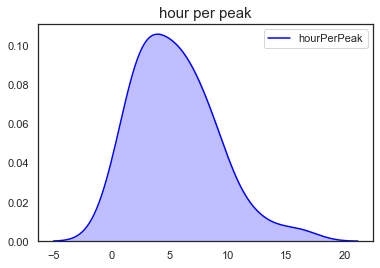

In [31]:
sns.kdeplot(supplyPerPeak_data['hourPerPeak'], shade=True, color="blue");
plt.title("hour per peak", fontsize=15);

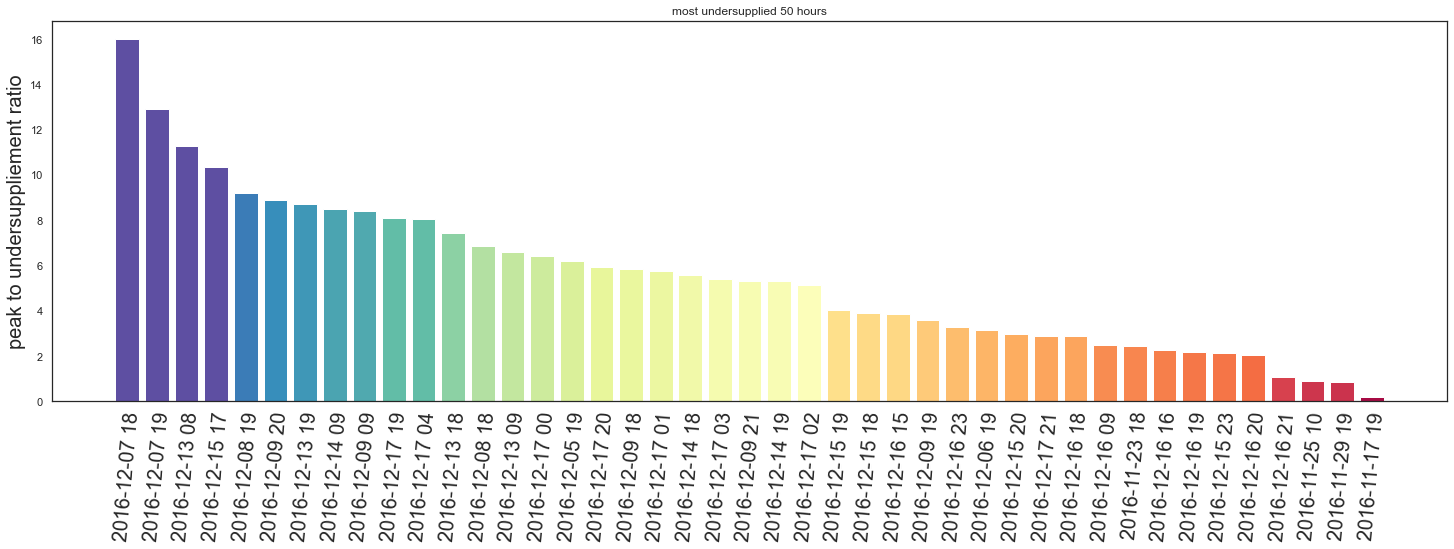

In [32]:
plt.figure(figsize=(25,7))
my_cmap = cm.get_cmap('Spectral')
my_norm = Normalize(vmin=0, vmax=10)
plt.bar(supplyPerPeak_data['date'] , supplyPerPeak_data['hourPerPeak'], color=my_cmap(my_norm(supplyPerPeak_data['hourPerPeak'])));
plt.xticks(supplyPerPeak_data['date'], supplyPerPeak_data['date'], rotation = 85, fontsize=20);
plt.title("most undersupplied 50 hours");
plt.ylabel("peak to undersuppliement ratio", fontsize=20);

In the above plot I calculated the number of hours that we need to cover to ensure a high coverage ratio in the highest peak hours. First I calculated the supply per peak percentage and from that I was able to calculate the hour per peak which enabled me to get the number of hours we need to cover to ensure a high coverage.

**5.1 - Calculate levels of guaranteed hourly earnings we can offer to drivers during 36 weekly hours with highest demand without losing money.**

In [33]:
driver_activity['avg_demand'] = overview_search['avg_demand']
driver_activity['avg_demand'] = driver_activity['avg_demand'].fillna(0)
driver_activity.replace(to_replace=0,value = 1)
higest_demand = driver_activity.sort_values(by = "avg_demand", ascending = False).head(50)
higest_demand['finished'] = higest_demand['finished'].replace(to_replace=0,value = 1)
higest_demand['finshedPerDay'] = higest_demand['rph'] / higest_demand['finished']
higest_demand = higest_demand[higest_demand['finshedPerDay'] > 0].head(36)
higest_demand['hourlyEarning'] = higest_demand['finshedPerDay'] * 8

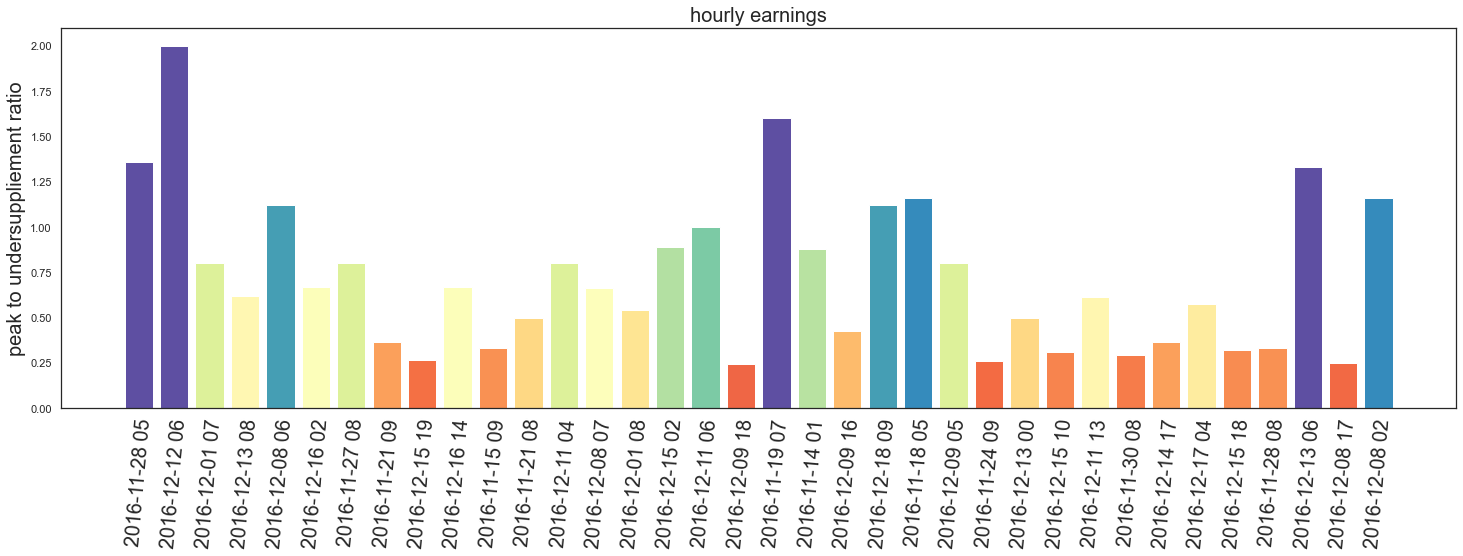

In [34]:
plt.figure(figsize=(25,7))
my_cmap = cm.get_cmap('Spectral')
my_norm = Normalize(vmin=0, vmax=1.3)
plt.bar(higest_demand['date'] , higest_demand['hourlyEarning'], color=my_cmap(my_norm(higest_demand['hourlyEarning'])));
plt.xticks(higest_demand['date'], higest_demand['date'], rotation = 85, fontsize=20);
plt.title("hourly earnings", fontsize=20);
plt.ylabel("peak to undersuppliement ratio", fontsize=20);

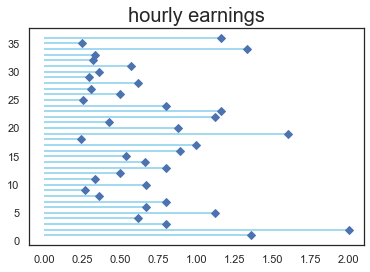

In [35]:
my_range=range(1,len(higest_demand['hourlyEarning'].index)+1);
plt.hlines(y=my_range, xmin=0, xmax=higest_demand['hourlyEarning'], color='skyblue');
plt.plot(higest_demand['hourlyEarning'], my_range, "D");
plt.title("hourly earnings", fontsize=20);

In the above plot we calculated the levels of guaranteed hourly earnings for 36 hours, by calculating the hourly earning of the drivers in the hours with the highest demand.

**5.2- Calculate how much extra hours we want to get to capture missed demand.**

In [36]:
higest_demand['hours_needed'] = higest_demand['rph'] * higest_demand['online'] * higest_demand['finished']
higest_demand = higest_demand[higest_demand['hours_needed'] > 0]
higest_demand = higest_demand.sort_values(by = "hours_needed", ascending = False).head(36)

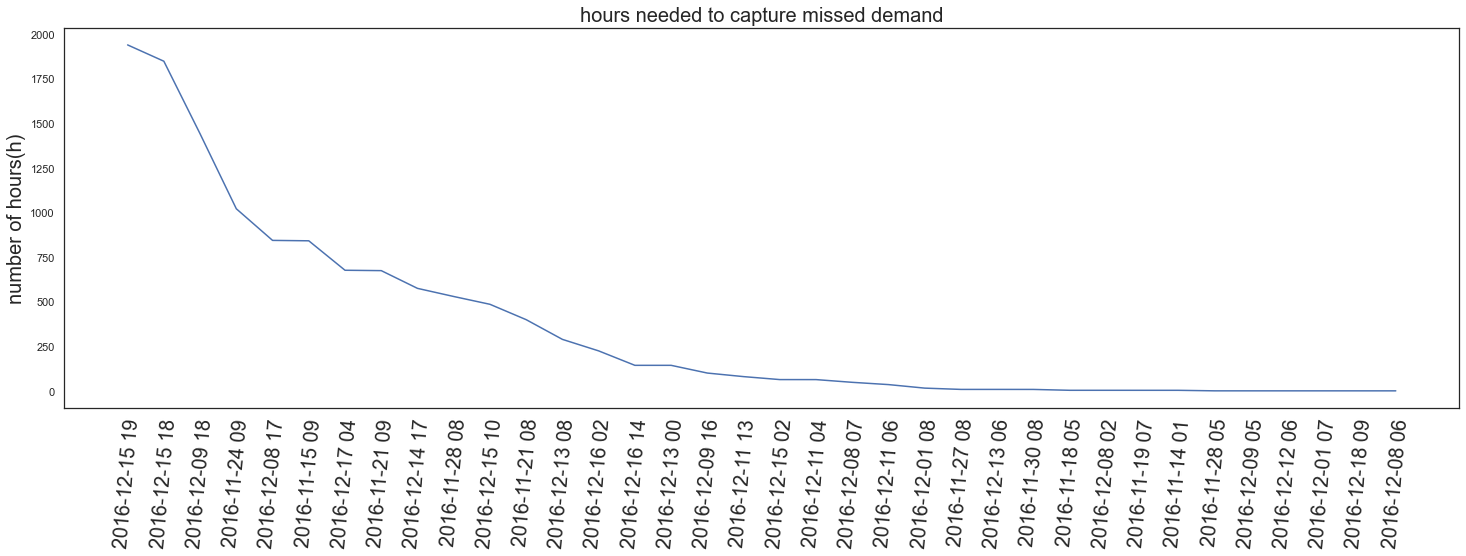

In [37]:
plt.figure(figsize=(25,7))
plt.plot(higest_demand['date'] , higest_demand['hours_needed']);
plt.xticks(higest_demand['date'], higest_demand['date'], rotation = 85, fontsize=20);
plt.title("hours needed to capture missed demand", fontsize=20);
plt.ylabel("number of hours(h)", fontsize=20);

In the above plot we calculated the number of hours we need to capture the most demand.

# Conclusion:
1- What is the supply to demand dynamic and whether they match?
> The supply and demand dynamic is not positive we see a lot of differences and gaps between the supply and demand ratio. there were hours that needed much more coverage and others that didn't.
> They don't match in some hours of day and match in others

2- Where are the hours of oversupply? Can we shift some of them to undersupply hours?
> yes there were some hours that oversupplied and other that were undersupplied
? I believe that we can shift it by sending the drivers promotions and ensure them the hourly earning of these hours and also alert the riders that they will get lower percentages if they ordered in the hours where we have oversuppliements.